In [1]:
# importing neccessary Packages
import os
import sys
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, normalize
warnings.filterwarnings('ignore')

import sys
import os
sys.path.insert(0,os.path.abspath('../scripts'))

import functions as fn
import user_experience as ue
import importlib
importlib.reload(fn)
importlib.reload(ue)


<module 'user_experience' from 'c:\\Users\\HP\\Desktop\\TenX\\user-overview-analysis\\scripts\\user_experience.py'>

In [2]:
# Loading Telecom dataset(USer_Engagment and Experience data) 

user_engagement  = pd.read_csv('../data/user_engagement.csv')
user_experience = pd.read_csv('../data/user_experiance.csv')

In [3]:
# Display the top user engagement dataset
user_engagement.head()

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume
0,3.360100e+10,1,1,116720.0,8.426375e+08
1,3.360100e+10,3,1,181230.0,1.207552e+08
2,3.360100e+10,2,1,134969.0,5.566597e+08
3,3.360101e+10,3,1,49878.0,4.019932e+08
4,3.360101e+10,0,2,37104.0,1.363130e+09


In [4]:
# Display the top user experience dataset
user_experience.head()

,MSISDN/Number,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,3.360100e+10,1,0.046,76.0,84998.414062
1,3.360100e+10,1,0.031,99.0,1119.757812
2,3.360100e+10,1,0.033,97.0,1119.757812
3,3.360101e+10,1,0.084,248.0,366.238281
4,3.360101e+10,0,0.119,56844.0,1858.683594


In [5]:
# Rename MSISDN_Number to Customer_Id
user_experience.rename(columns = {'MSISDN/Number':'Customer_Id'}, inplace=True)
user_experience.head()

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP
0,3.360100e+10,1,0.046,76.0,84998.414062
1,3.360100e+10,1,0.031,99.0,1119.757812
2,3.360100e+10,1,0.033,97.0,1119.757812
3,3.360101e+10,1,0.084,248.0,366.238281
4,3.360101e+10,0,0.119,56844.0,1858.683594


Task 4.1. An engagement score to each user and an experience score to each user.

In [10]:
#Load the model
with open("../models/user_engagement.pkl", "rb") as f:
    kmeans1 = pickle.load(f)
less_engaged_score = 3

In [6]:
engagement_data = user_engagement.set_index('Customer_Id')[
    ['Duration', 'Total_Data_Volume', 'Session_Frequency']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(engagement_data)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.174274,0.448341,-0.489228
1,0.319105,-1.104150,-0.489228
2,-0.034704,-0.166687,-0.489228
3,-0.685489,-0.499315,-0.489228
4,-0.783185,1.567721,0.749944


In [7]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.254009,0.653468,-0.713063
1,0.255463,-0.883937,-0.391656
2,-0.066994,-0.321785,-0.944440
3,-0.700151,-0.509996,-0.499693
4,-0.410865,0.822439,0.393427


In [14]:
distance = kmeans1.fit_transform(data_normalized)
distance_from_less_engaged_score = list(
    map(lambda x: x[less_engaged_score], distance))
user_engagement['Engagement_Score'] = distance_from_less_engaged_score
user_engagement.head(5)

,Customer_Id,Cluster,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score
0,3.360100e+10,1,1,116720.0,8.426375e+08,1.394970
1,3.360100e+10,3,1,181230.0,1.207552e+08,0.647752
2,3.360100e+10,2,1,134969.0,5.566597e+08,0.685544
3,3.360101e+10,3,1,49878.0,4.019932e+08,0.394153
4,3.360101e+10,0,2,37104.0,1.363130e+09,1.763811


In [15]:
with open("../models/user_experiance.pkl", "rb") as f:
    kmeans2 = pickle.load(f)
worst_experience = 0

In [16]:
experience_df = user_experience.set_index('Customer_Id')[
    ['Total_Avg_RTT', 'Total_Avg_Bearer_TP', 'Total_Avg_TCP']]
scaler = StandardScaler()
scaled_array = scaler.fit_transform(experience_df)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.178845,-0.492524,0.221159
1,-0.205141,-0.491983,-0.084914
2,-0.201635,-0.492030,-0.084914
3,-0.112226,-0.488476,-0.087664
4,-0.050867,0.843523,-0.082218


In [17]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.314452,-0.865976,0.388852
1,-0.380061,-0.911485,-0.157318
2,-0.374453,-0.913739,-0.157692
3,-0.220566,-0.960035,-0.172291
4,-0.059911,0.993496,-0.096835


In [18]:
experience_data = user_experience.set_index('Customer_Id')
distance = kmeans2.fit_transform(data_normalized)
distance_from_worst_experience = list(
    map(lambda x: x[worst_experience], distance))
user_experience['Experience_Score'] = distance_from_worst_experience
user_experience.head(5)

,Customer_Id,Cluster,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score
0,3.360100e+10,1,0.046,76.0,84998.414062,1.842195
1,3.360100e+10,1,0.031,99.0,1119.757812,1.827856
2,3.360100e+10,1,0.033,97.0,1119.757812,1.829275
3,3.360101e+10,1,0.084,248.0,366.238281,1.860082
4,3.360101e+10,0,0.119,56844.0,1858.683594,0.110699


The average of both Engagement & Experience Scores as  the satisfaction score & report the top 10 satisfied customers

In [19]:
user_id_engagement = user_engagement['Customer_Id'].values
user_id_experiance = user_experience['Customer_Id'].values
user_intersection = list(set(user_id_engagement).intersection(user_id_experiance))
user_intersection[:10]

[33662697474.0,
 33665581058.0,
 33628094468.0,
 33666105351.0,
 33782497288.0,
 33661386761.0,
 33620754445.0,
 33643560974.0,
 33761525777.0,
 33604501524.0]

In [20]:
# Shape of the dataset user_engagement
user_engagement_data = user_engagement[user_engagement['Customer_Id'].isin(user_intersection)]
user_engagement_data.shape

(106471, 6)

In [21]:
# Shape of dataset user_experience
user_experience_data = user_experience[user_experience['Customer_Id'].isin(
    user_intersection)]
user_experience_data.shape

(106471, 6)

In [22]:
user_data = pd.merge(user_engagement_data, user_experience_data, on='Customer_Id')
user_data['Satisfaction_Score'] = (
    user_data['Engagement_Score'] + user_data['Experience_Score'])/2
user_data.head(10)

,Customer_Id,Cluster_x,Session_Frequency,Duration,Total_Data_Volume,Engagement_Score,Cluster_y,Total_Avg_RTT,Total_Avg_Bearer_TP,Total_Avg_TCP,Experience_Score,Satisfaction_Score
0,3.360100e+10,1,1,116720.00,8.426375e+08,1.394970,1,0.046,76.0,84998.414062,1.842195,1.618583
1,3.360100e+10,3,1,181230.00,1.207552e+08,0.647752,1,0.031,99.0,1119.757812,1.827856,1.237804
2,3.360100e+10,2,1,134969.00,5.566597e+08,0.685544,1,0.033,97.0,1119.757812,1.829275,1.257410
3,3.360101e+10,3,1,49878.00,4.019932e+08,0.394153,1,0.084,248.0,366.238281,1.860082,1.127118
4,3.360101e+10,0,2,37104.00,1.363130e+09,1.763811,0,0.119,56844.0,1858.683594,0.110699,0.937255
5,3.360101e+10,0,2,253983.00,5.552080e+08,1.676059,1,0.057,7908.0,2239.515625,1.796507,1.736283
6,3.360101e+10,0,2,128360.00,5.530412e+08,1.539680,0,0.053,42513.0,2239.515625,0.207465,0.873573
7,3.360101e+10,3,1,86399.00,2.940851e+08,0.075659,1,0.052,1247.0,1119.757812,1.837268,0.956464
8,3.360101e+10,0,2,400808.75,8.965602e+08,1.791839,1,0.066,189.0,989.105469,1.850522,1.821180
9,3.360102e+10,1,1,124854.00,6.853728e+08,1.058091,1,0.062,146.0,1119.757812,1.848335,1.453213


In [23]:
#Comparing score
sat_score_data = user_data[['Customer_Id', 'Engagement_Score',
                        'Experience_Score', 'Satisfaction_Score']]
sat_score_data = sat_score_data.set_index('Customer_Id')
sat_score_data.head(10)

,Engagement_Score,Experience_Score,Satisfaction_Score
Customer_Id,,,
3.360100e+10,1.394970,1.842195,1.618583
3.360100e+10,0.647752,1.827856,1.237804
3.360100e+10,0.685544,1.829275,1.257410
3.360101e+10,0.394153,1.860082,1.127118
3.360101e+10,1.763811,0.110699,0.937255
3.360101e+10,1.676059,1.796507,1.736283
3.360101e+10,1.539680,0.207465,0.873573
3.360101e+10,0.075659,1.837268,0.956464
3.360101e+10,1.791839,1.850522,1.821180


In [24]:
sorted_by_satisfaction = sat_score_data.sort_values('Satisfaction_Score', ascending=False)
sat_top_10 = sorted_by_satisfaction['Satisfaction_Score'].head(10)
sat_top_10

Customer_Id
3.369957e+10    1.917941
3.360737e+10    1.917631
3.376160e+10    1.917400
3.367589e+10    1.915975
3.368861e+10    1.915556
3.368416e+10    1.915209
3.366409e+10    1.915079
3.365802e+10    1.914017
3.365023e+10    1.913957
3.363233e+10    1.913836
Name: Satisfaction_Score, dtype: float64

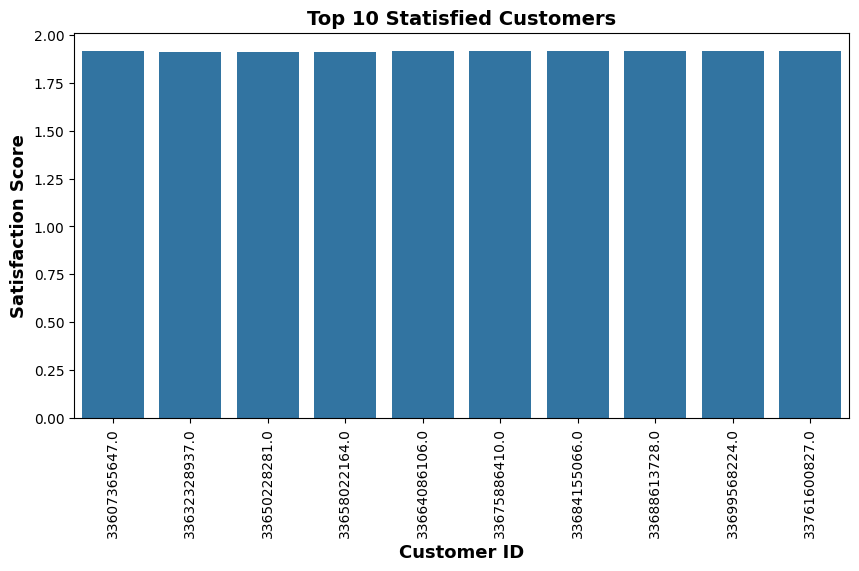

In [25]:
# Top 10 satisfied customers bar graph
fn.plot_bar(sat_top_10, 'Top 10 Statisfied Customers', 'Customer ID', 'Satisfaction Score')

Building a Regression Model

In [27]:
# importing library
from sklearn import model_selection,tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [28]:
# spliting datset as training and testing dataset
seed=42   
X = sat_score_data[['Engagement_Score', 'Experience_Score']]
y = sat_score_data[['Satisfaction_Score']]

#splitied data to test and train datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)
kfold = model_selection.KFold(n_splits=10, random_state=None)

In [29]:

models=tree.DecisionTreeRegressor()

In [30]:
#Calculating Mean Squared Error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(models, X_train, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())

Mean Absolute Error:  -0.0016718753533507852
Standard Deviation:  3.1313785789545306e-05


In [31]:
#Calculating Mean Squared Error
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(models, X_train, y_train, cv=kfold, scoring=scoring)
print()
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())


Mean Absolute Error:  -0.001667257154588648
Standard Deviation:  3.174897115376561e-05


In [33]:
#Calculating R Squared Value
scoring = "r2"
results = model_selection.cross_val_score(models, X_train, y_train, cv=kfold, scoring=scoring)
print()
print("Mean squared Error: ", results.mean())
print("Standard Deviation: ", results.std())



Mean squared Error:  0.9999324183917524
Standard Deviation:  2.5351598618947623e-06


In [40]:
linear_reg = LinearRegression()
models = linear_reg.fit(X_train, y_train)

In [36]:
print('Coefficients: \n', models.coef_)
print()
print("Mean squared error: %.2f" % np.mean((models.predict(X_test) - y_test) ** 2))
print('Variance score: %.2f' % models.score(X_test, y_test))
print 

Coefficients: 
 [[0.5 0.5]]

Mean squared error: 0.00
Variance score: 1.00


<function print>

K-Means (k=2) on the Engagement & the Experience Score

In [41]:
user_satisfaction_data = user_data[['Customer_Id', 'Engagement_Score', 'Experience_Score']].copy()
user_satisfaction_data = user_satisfaction_data.set_index('Customer_Id')
user_satisfaction_data.head(5)

,Engagement_Score,Experience_Score
Customer_Id,,
3.360100e+10,1.394970,1.842195
3.360100e+10,0.647752,1.827856
3.360100e+10,0.685544,1.829275
3.360101e+10,0.394153,1.860082
3.360101e+10,1.763811,0.110699


<Axes: >

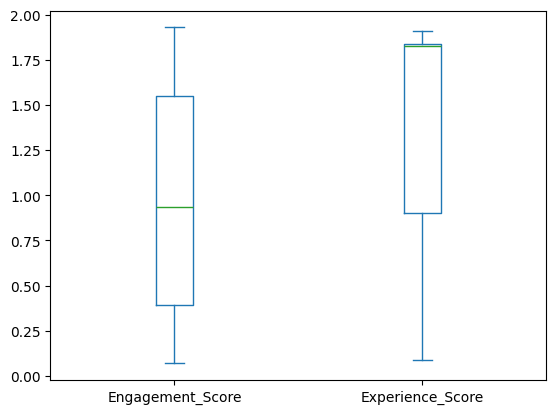

In [42]:
user_satisfaction_data.plot.box()

<Axes: >

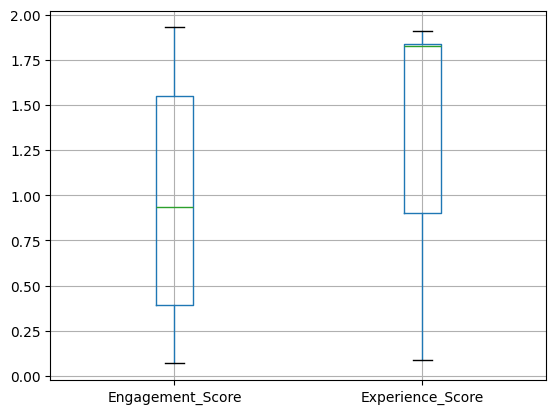

In [46]:
# Remove Outliers from Experience Score

ue.replace_outliers_with_iqr(user_satisfaction_data, ['Experience_Score'])
user_satisfaction_data.boxplot()

In [47]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(user_satisfaction_data)
scaled_array
pd.DataFrame(scaled_array).head(5)

,0,1
0,0.674649,0.647993
1,-0.536667,0.626733
2,-0.475402,0.628838
3,-0.947776,0.674512
4,1.272577,-1.919150


In [48]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1
0,0.721211,0.692715
1,-0.650419,0.759576
2,-0.603059,0.797696
3,-0.814737,0.579831
4,0.552637,-0.833422


In [49]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data_normalized)

In [50]:
user_satisfaction_data.insert(0, 'Cluster', kmeans.labels_)
user_satisfaction_data.head(5)

,Cluster,Engagement_Score,Experience_Score
Customer_Id,,,
3.360100e+10,0,1.394970,1.842195
3.360100e+10,1,0.647752,1.827856
3.360100e+10,1,0.685544,1.829275
3.360101e+10,1,0.394153,1.860082
3.360101e+10,0,1.763811,0.110699


In [51]:
user_satisfaction_data['Cluster'].value_counts()

Cluster
0    55107
1    51364
Name: count, dtype: int64

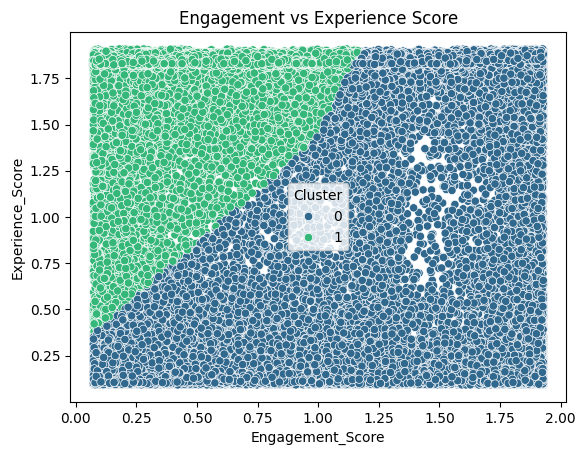

In [55]:
# Scatter plot using Seaborn
sns.scatterplot(data=user_satisfaction_data, x='Engagement_Score', y='Experience_Score', hue='Cluster', palette='viridis')

# Show plot
plt.title('Engagement vs Experience Score')
plt.show()

In [54]:
user_satisfaction_data.groupby('Cluster').agg({'Engagement_Score': 'sum', 'Experience_Score': 'sum'})

,Engagement_Score,Experience_Score
Cluster,,
0,77214.809293,58561.558040
1,26999.284509,91044.527811


This result shows that Cluster 0 has smaller Engagement score and higher Experience score. On the other hand, Clustor 1 has maximum Engagement score and minimal experience score.